![FIT_CTU_LOGO](https://fit.cvut.cz/media-a-pr/corporate-identity/logo-fit-en-cerna.svg)
# FIT ƒåVUT v Praze, [BI-PST](https://courses.fit.cvut.cz/BI-PST), ZS 2021/2022
## Dom√°c√≠ √∫loha - Daniel Bukaƒç, Alexandr Czern√Ω
## Data a parametry
Ze sv√© trojice vyberte reprezentanta. √ölohu odevzdejte cviƒç√≠c√≠mu, ke kter√©mu reprezentant p≈ô√≠slu≈°√≠ podle p≈Øvodn√≠ho p≈ôi≈ôazen√≠ paralelek v Kosu. Parametry √∫lohy spoƒçtƒõte n√°sledovnƒõ:

- K = den narozen√≠ reprezentanta skupiny (1-31),
- L = poƒçet p√≠smen v p≈ô√≠jmen√≠ reprezentanta,
- M = ((K+L)*47)mod(11)+1.

Naƒçtƒõte datov√Ω soubor z R knihovny Sleuth2 podle n√°sleduj√≠c√≠ tabulky:

|M|Datov√Ω soubor|Popis|
|:-:|:-------------:|:-----|
|1|case0101|sk√≥re v kreativitƒõ dle typu motivace|
|2|case0102|mzda dle pohlav√≠|
|3|case0201|d√©lka humeru dle p≈ôe≈æit√≠ vrabc≈Ø|
|4|case0202|objem hipokampu dle schizofrenie|
|5|case0301|sr√°≈æky dle o≈°et≈ôen√≠ mrak≈Ø|
|6|case0302|koncentrace dioxinu dle vojensk√©ho p≈Øsobi≈°tƒõ|
|7|case0402|doba ≈ôe≈°en√≠ √∫kolu dle typu v√Ωuky geometrie|
|8|ex0112|krevn√≠ tlak dle diety|
|9|ex0211|p≈ôe≈æit√≠ morƒçat dle typu experimentu|
|10|ex0221|v√°ha dle p≈ôe≈æit√≠ vrabc≈Ø|
|11|ex0222|hladina cholesterolu dle prost≈ôed√≠|

## √ökoly

1. **(1b)** Naƒçtƒõte datov√Ω soubor a rozdƒõlte sledovanou promƒõnnou na p≈ô√≠slu≈°n√© dvƒõ pozorovan√© skupiny. Struƒçnƒõ popi≈°te data a zkouman√Ω probl√©m. Pro ka≈ædu skupinu zvl√°≈°≈• odhadnƒõte st≈ôedn√≠ hodnotu, rozptyl a medi√°n p≈ô√≠slu≈°n√©ho rozdƒõlen√≠.
2. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• odhadnƒõte hustotu a distribuƒçn√≠ funkci pomoc√≠ histogramu a empirick√© distribuƒçn√≠ funkce.
3. **(3b)** Pro ka≈ædou skupinu zvl√°≈°≈• najdƒõte nejbli≈æ≈°√≠ rozdƒõlen√≠: Odhadnƒõte parametry norm√°ln√≠ho, exponenci√°ln√≠ho a rovnomƒõrn√©ho rozdƒõlen√≠. Zaneste p≈ô√≠slu≈°n√© hustoty s odhadnut√Ωmi parametry do graf≈Ø histogramu. Diskutujte, kter√© z rozdƒõlen√≠ odpov√≠d√° pozorovan√Ωm dat≈Øm nejl√©pe.
4. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• vygenerujte n√°hodn√Ω v√Ωbƒõr o 100 hodnot√°ch z rozdƒõlen√≠, kter√© jste zvolili jako nejbli≈æ≈°√≠, s parametry odhadnut√Ωmi v p≈ôedchoz√≠m bodƒõ. Porovnejte histogram simulovan√Ωch hodnot s pozorovan√Ωmi daty.
5. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• spoƒç√≠tejte oboustrann√Ω 95% konfidenƒçn√≠ interval pro st≈ôedn√≠ hodnotu.
6. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• otestujte na hladinƒõ v√Ωznamnosti 5 % hypot√©zu, zda je st≈ôedn√≠ hodnota rovn√° hodnotƒõ K (parametr √∫lohy), proti oboustrann√© alternativƒõ. M≈Ø≈æete pou≈æ√≠t buƒè v√Ωsledek z p≈ôede≈°l√©ho bodu, nebo v√Ωstup z p≈ô√≠slu≈°n√© vestavƒõn√© funkce va≈°eho softwaru.
7. **(2b)** Na hladinƒõ v√Ωznamnosti 5 % otestujte, jestli maj√≠ pozorovan√© skupiny stejnou st≈ôedn√≠ hodnotu. Typ testu a alternativy stanovte tak, aby va≈°e volba nejl√©pe korespondovala s povahou zkouman√©ho probl√©mu.

### Retrieve dataset from R library

In [15]:
### import required libraries

import math
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from scipy.stats import norm, expon, uniform, ttest_1samp, t as students_t_distr

Podle n√°sleduj√≠c√≠ho v√Ωpoƒçtu jsme zvolili datovou sadu **case0302**:

In [35]:
K = 15
L = len("Bukac")
M = ((K + L) * 47) % (11) + 1
print(">>> {}".format(M))

>>> 6


### √ökol 1
(1b) **Naƒçtƒõte datov√Ω soubor a rozdƒõlte sledovanou promƒõnnou na p≈ô√≠slu≈°n√© dvƒõ pozorovan√© skupiny. Struƒçnƒõ popi≈°te data a zkouman√Ω probl√©m. Pro ka≈ædu skupinu zvl√°≈°≈• odhadnƒõte st≈ôedn√≠ hodnotu, rozptyl a medi√°n p≈ô√≠slu≈°n√©ho rozdƒõlen√≠.**

**FIXME:** Discuss dataset and data structure

In [17]:
### load and split dataset

data = pd.read_csv("./data.csv")
data_vietnam = data[data.Veteran == "Vietnam"]
data_other = data[~(data.Veteran == "Vietnam")]

### preview data
display(data)

Dioxin  Veteran
0         0  Vietnam
1         0  Vietnam
2         0  Vietnam
3         0  Vietnam
4         0  Vietnam
..      ...      ...
738       9    Other
739       9    Other
740      10    Other
741      11    Other
742      15    Other

[743 rows x 2 columns]

In [18]:
### estimate expected value, variance and median of given distributions

### vietnam group estimations
E_vietnam = data_vietnam.Dioxin.mean()
VAR_vietnam = data_vietnam.Dioxin.var()
median_vietnam = data_vietnam.Dioxin.median()

### other group estimations
E_other = data_other.Dioxin.mean()
VAR_other = data_other.Dioxin.var()
median_other = data_other.Dioxin.median()

### display results
print("Vietnam group estimated values:")
print(">>> Expected value:", E_vietnam)
print(">>> Variance:", VAR_vietnam)
print(">>> Median:", median_vietnam)
print()
print("Other group estimated values:")
print(">>> Expected value:", E_other)
print(">>> Variance:", VAR_other)
print(">>> Median:", median_other)

Vietnam group estimated values:
>>> Expected value: 4.260061919504644
>>> Variance: 6.98342573259414
>>> Median: 4.0

Other group estimated values:
>>> Expected value: 4.185567010309279
>>> Variance: 5.298539518900344
>>> Median: 4.0


### √ökol 2
(1b) **Pro ka≈ædou skupinu zvl√°≈°≈• odhadnƒõte hustotu a distribuƒçn√≠ funkci pomoc√≠ histogramu a empirick√© distribuƒçn√≠ funkce.**

[Text(0.5, 1.0, 'Vietnam group - estimate of the distribution using histogram'),
 Text(0.5, 0, 'Dioxin concentration')]

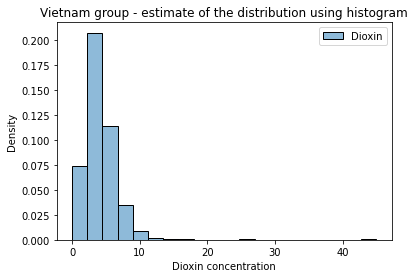

In [19]:
### vietnam group - histogram

ax = sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density"
)
ax.set(
    title="Vietnam group - estimate of the distribution using histogram",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Other group - estimate of the distribution using histogram'),
 Text(0.5, 0, 'Dioxin concentration')]

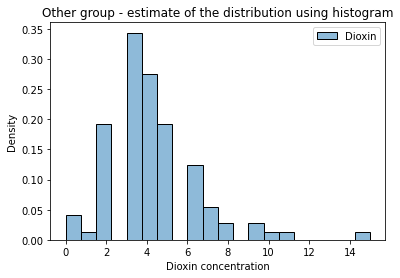

In [20]:
### other group - histogram

ax = sb.histplot(
    data=data_other,
    bins=20,
    stat="density"
)
ax.set(
    title="Other group - estimate of the distribution using histogram",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Vietnam group - estimate of the distribution using empirical distribution function'),
 Text(0.5, 0, 'Dioxin concentration')]

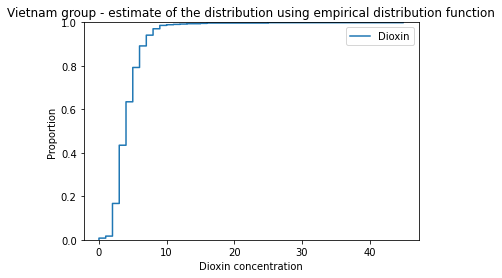

In [21]:
### vietnam group - distribution function

ax = sb.ecdfplot(data=data_vietnam)
ax.set(
    title="Vietnam group - estimate of the distribution using empirical distribution function",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Other group - estimate of the distribution using empirical distribution function'),
 Text(0.5, 0, 'Dioxin concentration')]

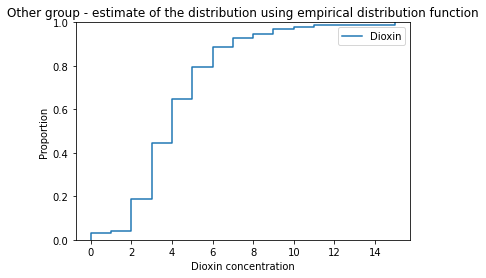

In [22]:
### other group - distribution function

ax = sb.ecdfplot(data=data_other)
ax.set(
    title="Other group - estimate of the distribution using empirical distribution function",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Vietnam group - density estimation of the distribution'),
 Text(0.5, 0, 'Dioxin concentration')]

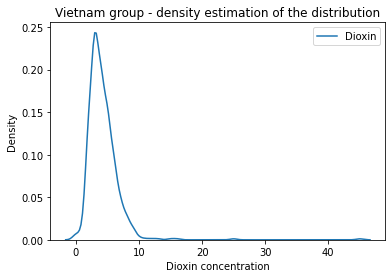

In [23]:
### vietnam group - density

ax = sb.kdeplot(data=data_vietnam, bw_adjust=.75)
ax.set(
    title="Vietnam group - density estimation of the distribution",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Other group - density estimation of the distribtuin'),
 Text(0.5, 0, 'Dioxin concentration')]

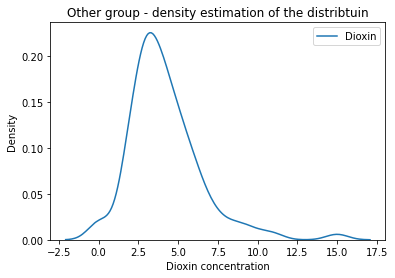

In [24]:
### other group - density

ax = sb.kdeplot(data=data_other, bw_adjust=.75)
ax.set(
    title="Other group - density estimation of the distribtuin",
    xlabel="Dioxin concentration"
)

In [25]:
### vietnam group - estimated distribution parameters

viet_norm_distr_expected_value, viet_norm_distr_std_deviance = norm.fit(data_vietnam.Dioxin, method="MLE")
viet_expon_distr_expected_value, viet_expon_distr_std_deviance = expon.fit(data_vietnam.Dioxin, floc=0, method="MLE")
viet_uniform_distr_a, viet_uniform_distr_b = uniform.fit(data_vietnam.Dioxin, method="MLE")

print("Vietnam group - estimated distribution parameters")
print(">>> Normal distribution -> ùùÅ = {}, ùõî = {}".format(
    viet_norm_distr_expected_value,
    viet_norm_distr_std_deviance ** 2
))
print(">>> Exponential distribution -> ùõå = {}".format( ### FIXME: location and scale are returned
    1 / viet_expon_distr_std_deviance
))
print(">>> Uniform distribution -> ùêö = {}, ùêõ = {}".format(
    viet_uniform_distr_a,
    viet_uniform_distr_b
))

Vietnam group - estimated distribution parameters
>>> Normal distribution -> ùùÅ = 4.260061919504644, ùõî = 6.9726154760421375
>>> Exponential distribution -> ùõå = 0.23473837209302323
>>> Uniform distribution -> ùêö = 0.0, ùêõ = 45.0


### √ökol 3
(3b) **Pro ka≈ædou skupinu zvl√°≈°≈• najdƒõte nejbli≈æ≈°√≠ rozdƒõlen√≠: Odhadnƒõte parametry norm√°ln√≠ho, exponenci√°ln√≠ho a rovnomƒõrn√©ho rozdƒõlen√≠. Zaneste p≈ô√≠slu≈°n√© hustoty s odhadnut√Ωmi parametry do graf≈Ø histogramu. Diskutujte, kter√© z rozdƒõlen√≠ odpov√≠d√° pozorovan√Ωm dat≈Øm nejl√©pe.**

**FIXME:** Discuss results  
**FIXME:** Add labels to plots

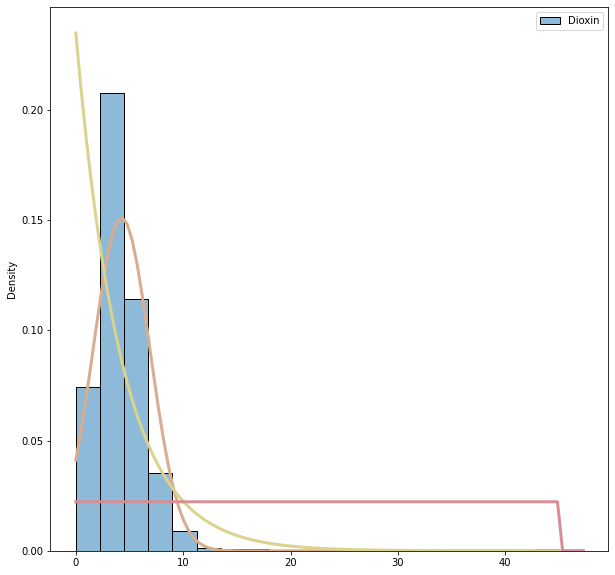

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density",
    kde=False
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(x_axis_values, viet_norm_distr_expected_value, viet_norm_distr_std_deviance)
expon_distr_pdf = expon.pdf(x_axis_values, viet_expon_distr_expected_value, viet_expon_distr_std_deviance)
uniform_distr_pdf = uniform.pdf(x_axis_values, viet_uniform_distr_a, viet_uniform_distr_b)
sb.lineplot(x=x_axis_values, y=norm_distr_pdf, color="#d9ad8e", linewidth=3)
sb.lineplot(x=x_axis_values, y=expon_distr_pdf, color="#d9d38e", linewidth=3)
sb.lineplot(x=x_axis_values, y=uniform_distr_pdf, color="#d98e95", linewidth=3)
plt.show()

In [27]:
### other group - estimated distribution parameters

other_norm_distr_expected_value, other_norm_distr_std_deviance = norm.fit(data_other.Dioxin, method="MLE")
other_expon_distr_expected_value, other_expon_distr_std_deviance = expon.fit(data_other.Dioxin, method="MLE")
other_uniform_distr_a, other_uniform_distr_b = uniform.fit(data_other.Dioxin, method="MLE") 

print("Other group - estimated distribution parameters")
print(">>> Normal distribution -> ùùÅ = {}, ùõî = {}".format(
    other_norm_distr_expected_value,
    other_norm_distr_std_deviance
))
print(">>> Exponential distribution -> ùõå = {}".format(
    1 / other_expon_distr_std_deviance
))
print(">>> Uniform distribution -> ùêö = {}, ùêõ = {}".format(
    other_uniform_distr_a, other_uniform_distr_b
))

Other group - estimated distribution parameters
>>> Normal distribution -> ùùÅ = 4.185567010309279, ùõî = 2.2899596940009213
>>> Exponential distribution -> ùõå = 0.23891625615763545
>>> Uniform distribution -> ùêö = 0.0, ùêõ = 15.0


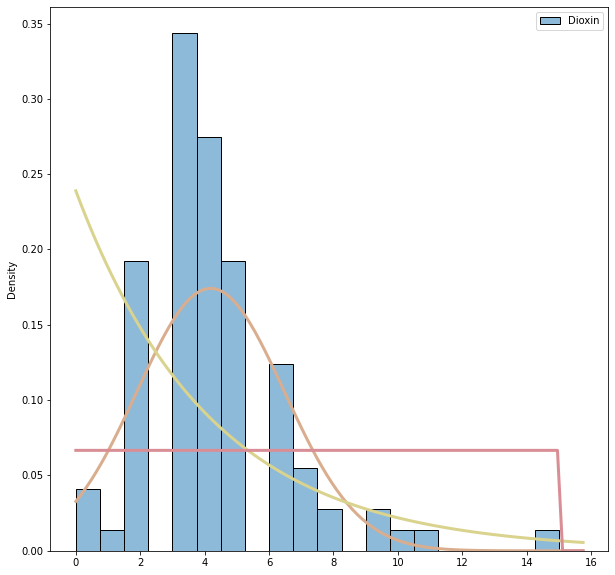

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.histplot(
    data=data_other,
    bins=20,
    stat="density",
    kde=False
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(x_axis_values, other_norm_distr_expected_value, other_norm_distr_std_deviance)
expon_distr_pdf = expon.pdf(x_axis_values, other_expon_distr_expected_value, other_expon_distr_std_deviance)
uniform_distr_pdf = uniform.pdf(x_axis_values, other_uniform_distr_a, other_uniform_distr_b)
sb.lineplot(x=x_axis_values, y=norm_distr_pdf, color="#d9ad8e", linewidth=3)
sb.lineplot(x=x_axis_values, y=expon_distr_pdf, color="#d9d38e", linewidth=3)
sb.lineplot(x=x_axis_values, y=uniform_distr_pdf, color="#d98e95", linewidth=3)
plt.show()

### √ökol 4
(1b) **Pro ka≈ædou skupinu zvl√°≈°≈• vygenerujte n√°hodn√Ω v√Ωbƒõr o 100 hodnot√°ch z rozdƒõlen√≠, kter√© jste zvolili jako nejbli≈æ≈°√≠, s parametry odhadnut√Ωmi v p≈ôedchoz√≠m bodƒõ. Porovnejte histogram simulovan√Ωch hodnot s pozorovan√Ωmi daty.**

<AxesSubplot:ylabel='Density'>

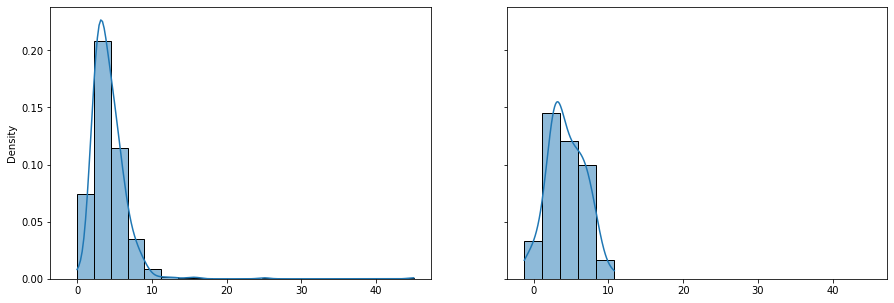

In [98]:
### vietnam group - data comparison

data_vietnam_simulated = np.random.normal(
    loc=viet_norm_distr_expected_value,
    scale=viet_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(15, 5)
)
sb.histplot(
    data_vietnam,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
sb.histplot(
    data_vietnam_simulated,
    bins=5,
    stat="density",
    kde=True,
    ax=ax2
)

<AxesSubplot:ylabel='Density'>

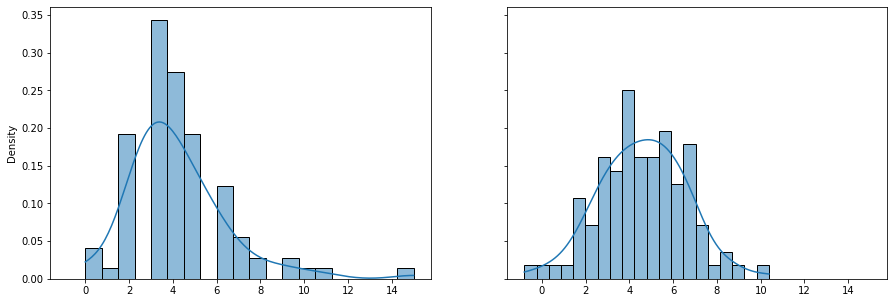

In [99]:
### other group - data comparison

data_other_simulated = np.random.normal(
    loc=other_norm_distr_expected_value,
    scale=other_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(15, 5)
)
sb.histplot(
    data_other,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
sb.histplot(
    data_other_simulated,
    bins=20,
    stat="density",
    kde=True,
    ax=ax2
)

### √ökol 5
(1b) **Pro ka≈ædou skupinu zvl√°≈°≈• spoƒç√≠tejte oboustrann√Ω 95% konfidenƒçn√≠ interval pro st≈ôedn√≠ hodnotu.**

In [45]:
### vietnam group - 95% confidence interval for expected value

mean = data_vietnam.Dioxin.mean()
std = data_vietnam.Dioxin.std()
count = data_vietnam.Dioxin.count()
t = students_t_distr.ppf(q=1 - 0.025, df=count - 1)
L_viet = mean - t * std / math.sqrt(count)
U_viet = mean + t * std / math.sqrt(count)
print(">>> ({}, {})".format(L_viet, U_viet))

>>> (4.05589668169332, 4.464227157315968)


In [46]:
### other group - 95% confidence interval for expected value

mean = data_other.Dioxin.mean()
std = data_other.Dioxin.std()
count = data_other.Dioxin.count()
t = students_t_distr.ppf(q=1 - 0.025, df=count - 1)
L_other = mean - t * std / math.sqrt(count)
U_other = mean + t * std / math.sqrt(count)
print(">>> ({}, {})".format(L_other, U_other))

>>> (3.721640382345717, 4.64949363827284)


### √ökol 6 - Pro ka≈ædou skupinu zvl√°≈°≈• na hladinƒõ v√Ωznamnosti 5% otestovat hypot√©zu, zda je st≈ôedn√≠ hodnota rovna hodnotƒõ K (parametr √∫lohy), proti oboustrann√© alternativƒõ. M≈Ø≈æete pou≈æ√≠t buƒè v√Ωsledek z p≈ôede≈°l√©ho bodu, nebo v√Ωstup z p≈ô√≠slu≈°n√© vestavƒõn√© funkce va≈°eho softwaru.

In [42]:
### vietnam_group - 

### INTERPRET RESULTS HERE:
# K = 0
# viet_statistic, viet_pvalue = ttest_1samp(data_vietnam.Dioxin, K, alternative="two-sided")
# print(">>> {}, {}".format(viet_statistic, viet_pvalue))

### Testujeme hypot√©zu o st≈ôedn√≠ hodnotƒõ norm√°ln√≠ho rozdƒõlen√≠ proti oboustrann√© alternativƒõ, tedy
### H0 : ùùÅ = K proti HA : ùùÅ != K
### Pot≈ôebujeme tedy oboustrann√Ω (1 - Œ±)% interval spolehlivosti.
### Rozptyl rozdƒõlen√≠ je nezn√°m√Ω, tedy interval sestav√≠me pomoc√≠ Studentova rozdƒõlen√≠.
### Tento interval jsme ov≈°em spoƒç√≠tali v minul√©m √∫kolu a tedy dost√°v√°me interval
### (L, U) = (3.721640382345717, 4.64949363827284)
### Pokud testovanou hodnotu K interval pokr√Ωv√°, hypot√©zu H0 tedy na hladinƒõ v√Ωznamnosti 5% nezam√≠t√°me.
### V opaƒçn√©m p≈ô√≠padƒõ hypot√©zu H0 zam√≠tneme a p≈ôijmeme alternativn√≠ hypot√©zu HA.

In [33]:
### other group - 

# K = 16
# other_statistic, other_pvalue = ttest_1samp(data_other.Dioxin, K)
# print(">>> {}, {}".format(other_statistic, other_pvalue))

### Testujeme hypot√©zu o st≈ôedn√≠ hodnotƒõ norm√°ln√≠ho rozdƒõlen√≠ proti oboustrann√© alternativƒõ, tedy
### H0 : ùùÅ = K proti HA : ùùÅ != K
### Pot≈ôebujeme tedy oboustrann√Ω (1 - Œ±)% interval spolehlivosti.
### Rozptyl rozdƒõlen√≠ je nezn√°m√Ω, tedy interval sestav√≠me pomoc√≠ Studentova rozdƒõlen√≠.
### Tento interval jsme ov≈°em spoƒç√≠tali v minul√©m √∫kolu a tedy dost√°v√°me interval
### (L, U) = (3.721640382345717, 4.64949363827284)
### Pokud testovanou hodnotu K interval pokr√Ωv√°, hypot√©zu H0 tedy na hladinƒõ v√Ωznamnosti 5% nezam√≠t√°me.
### V opaƒçn√©m p≈ô√≠padƒõ hypot√©zu H0 zam√≠tneme a p≈ôijmeme alternativn√≠ hypot√©zu HA.

>>> -50.549941993930965, 5.5021882620358755e-71


### √ökol 7
(2b) **Na hladinƒõ v√Ωznamnosti 5 % otestujte, jestli maj√≠ pozorovan√© skupiny stejnou st≈ôedn√≠ hodnotu. Typ testu a alternativy stanovte tak, aby va≈°e volba nejl√©pe korespondovala s povahou zkouman√©ho probl√©mu.**

NameError: name 'tets' is not defined